# Importing Libraries

Let's import the libraries needed and then read the data from the "GlobalTemperatures.csv" file, which has a monthly Earth’s temperature and plot it on the chart.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
global_temp = pd.read_csv("GlobalTemperatures.csv")
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing
    
    a.. remove duplicate rows
    b.. remove irrelevant data.
    c.. Fix structural errors.
    d.. check missing values in data
    e.. check data-type of each feature is right or not..
    f.. deal with the out
    liers
Let's see if have null values in our data

In [3]:
global_temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [4]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


Let's see if have duplicate values in our data

In [5]:
global_temp.duplicated().sum()

0

date-type of 'dt' must be 'Date-time' bcz it holds date-time values..

in date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype ,
ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..


In [6]:
global_temp['dt'].dtype

dtype('O')

In [7]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['dt'].dtype

dtype('<M8[ns]')

## Does Global Warming Exists?

In [8]:
#dt --> import datetime as dt by default
global_temp['Year'] = global_temp['dt'].dt.year

In [9]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [10]:
## finding "avg_LandAverageTemperature" & 
## "avg_LandAverageTemperatureUncertainty" for each of the year..

data = global_temp.groupby('Year').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [11]:
data.columns

Index(['Year', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty'], dtype='object')

    Maximum Uncertainty will be Avg temperature  +   deviation(Uncertainty)

    whereas minimum Uncertainty will be Avg temp -   deviation(Uncertainty)

    and this deviation is exactly your Uncertainty...

In [12]:
data['Uncertainty_top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']
data.head()

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


<Axes: xlabel='Year'>

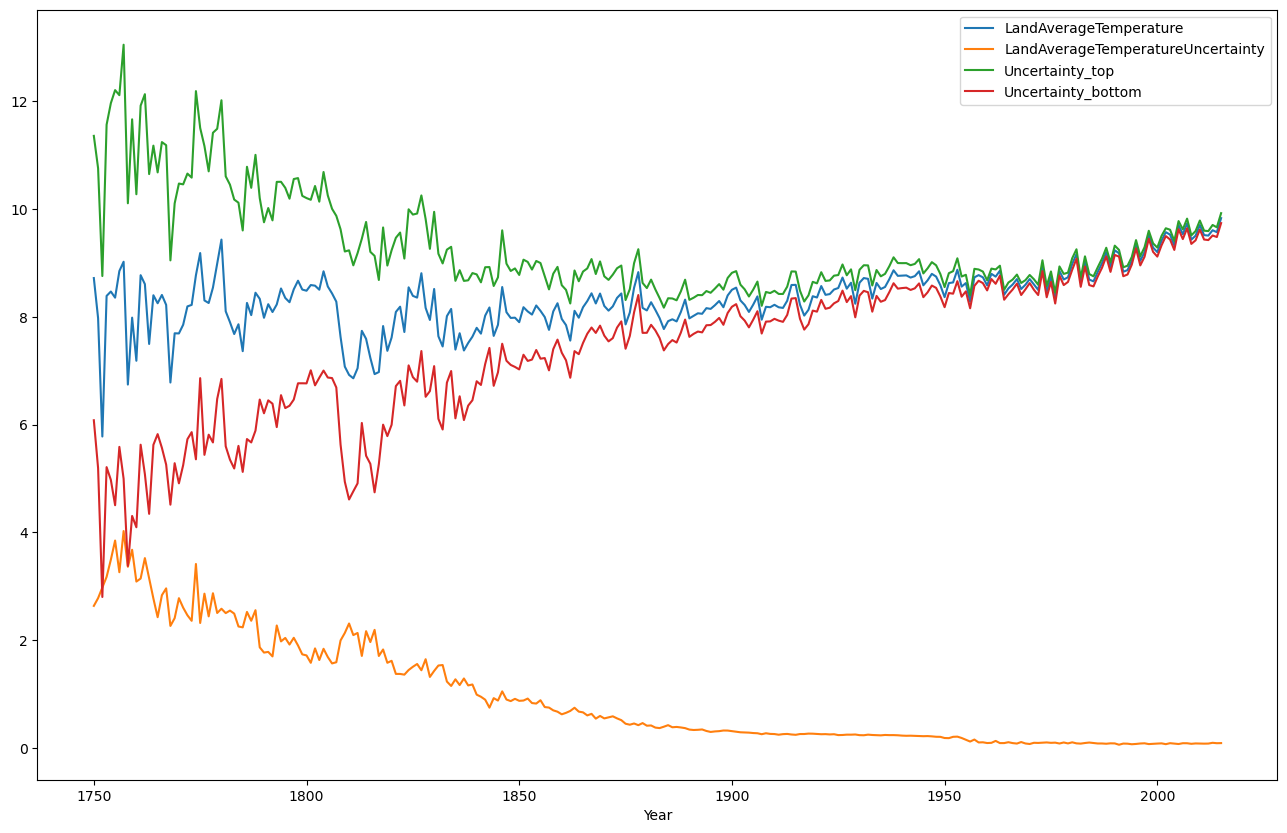

In [13]:
### pandas lineplot
data.plot(x = 'Year', y = ['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
                            'Uncertainty_top','Uncertainty_bottom'], figsize = (16,10))

Conclusion ::  From the charts you can see, that there is global warming nowadays. 
The average temperature of Earth surface has the highest value in 
the last three centuries. The fastest temperature growth occurred 
in the last 30 years! This worries me, I hope soon humanity will 
fully switch to ecological sources of energy, that will reduce CO2. 
If it’s will not happened, we will be in disaster. This charts also 
have confidence intervals, which shows that measurement of temperatur
e has become more accurate in the last fewyears.


## Seasonal Change in Temp #Analyse Average temperature in each season ?

In [14]:
## extract 'month' from 'dt' feature.
global_temp['Month'] = global_temp['dt'].dt.month
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2


In [15]:
global_temp['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

3-5 - Spring
6-8 - Summer
9-11 - Autumn
12-2 - Winter

In [16]:
## lets define a function to extract season from 'month'
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

In [17]:
## applying a function on top of 'month' feature..
global_temp['Season'] = global_temp['Month'].apply(get_season)
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month,Season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,Winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,Winter


In [18]:
global_temp['Season'].unique()  # Check for case sensitive

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [19]:
## lets define 4 blank lists to store all the "season temp"  of "various years"
years = global_temp['Year'].unique()
avg_temp_spring = []
avg_temp_summer = []
avg_temp_autumn = []
avg_temp_winter = []

for year in years:
    current_year = global_temp[global_temp['Year'] == year]
    
    avg_temp_spring.append(current_year[current_year['Season'] == 'Spring']['LandAverageTemperature'].mean())
    avg_temp_summer.append(current_year[current_year['Season'] == 'Summer']['LandAverageTemperature'].mean())
    avg_temp_autumn.append(current_year[current_year['Season'] == 'Autumn']['LandAverageTemperature'].mean())
    avg_temp_winter.append(current_year[current_year['Season'] == 'Winter']['LandAverageTemperature'].mean())

In [20]:
### lets make a blank dataframe
season_data = pd.DataFrame()

## assigning features in dataframe..

season_data['Year']=years
season_data['Avg_Temp_Spring'] = avg_temp_spring
season_data['Avg_Temp_Summer'] = avg_temp_summer
season_data['Avg_Temp_Autumn'] = avg_temp_autumn
season_data['Avg_Temp_Winter'] = avg_temp_winter

In [21]:
season_data.head()

,Year,Avg_Temp_Spring,Avg_Temp_Summer,Avg_Temp_Autumn,Avg_Temp_Winter
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


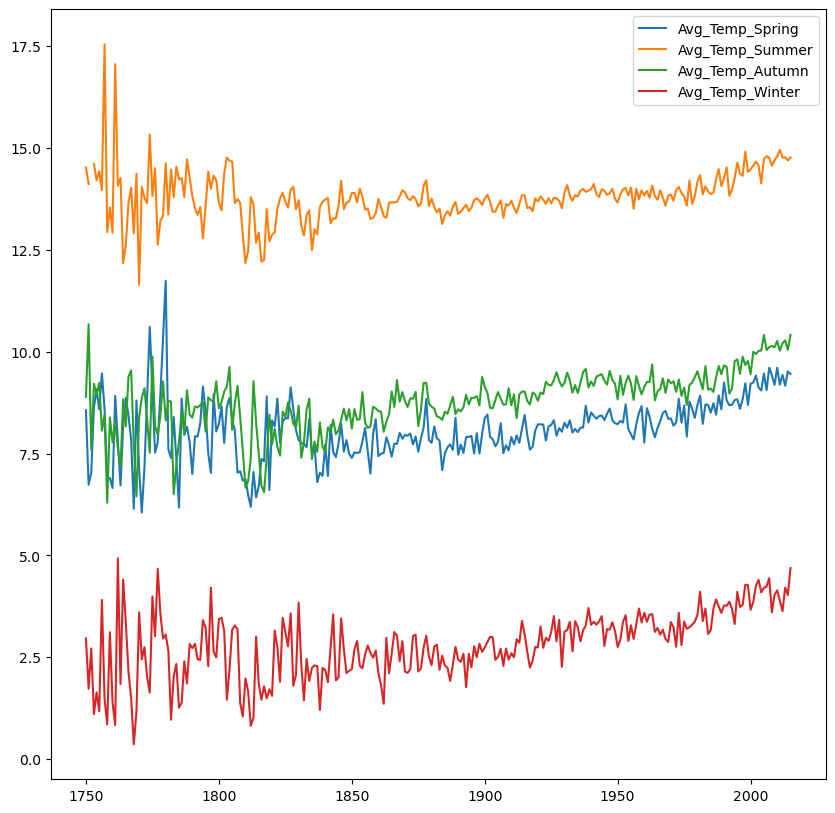

In [22]:
plt.figure(figsize = (10,10))
plt.plot(season_data['Year'],season_data[['Avg_Temp_Spring','Avg_Temp_Summer','Avg_Temp_Autumn',
'Avg_Temp_Winter']])
plt.legend(['Avg_Temp_Spring','Avg_Temp_Summer','Avg_Temp_Autumn',
'Avg_Temp_Winter'])

seasons are definitely getting warmer

## Time Series Modelling

sampling of data & then pre-processing of data 

In [23]:
cities_temp = pd.read_csv(("GlobalLandTemperaturesByCity.csv"))
cities_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [24]:
cities_temp.shape

(8599212, 7)

#### how to do sampling in data..
    1.. Random sampling
    2.. we say pick first 1M or last 1M points..
    3.. we say we pick data for Top economies.. (Russia ,USA ,
             UK ,India ,France etc.. )
             
         or pick data for some cities of USA , eg 
         ['New York','Los Angeles','San Francisco' ,'Mumbai' ,'Delhi']

In [25]:
## finding unique countries in 'country' feature
cities_temp['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [26]:
## creating separate datafrme for 'United States' only
usa = cities_temp[cities_temp['Country'] == 'United States']

## unique cities in 'usa'
usa['City'].unique()

array(['Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allentown',
       'Amarillo', 'Anaheim', 'Anchorage', 'Ann Arbor', 'Antioch',
       'Arlington', 'Arvada', 'Atlanta', 'Aurora', 'Austin',
       'Bakersfield', 'Baltimore', 'Baton Rouge', 'Beaumont', 'Bellevue',
       'Berkeley', 'Birmingham', 'Boston', 'Bridgeport', 'Brownsville',
       'Buffalo', 'Burbank', 'Cambridge', 'Cape Coral', 'Carrollton',
       'Cary', 'Cedar Rapids', 'Chandler', 'Charleston', 'Charlotte',
       'Chattanooga', 'Chesapeake', 'Chicago', 'Chula Vista',
       'Cincinnati', 'Clarksville', 'Clearwater', 'Cleveland',
       'Colorado Springs', 'Columbia', 'Columbus', 'Concord',
       'Coral Springs', 'Corona', 'Corpus Christi', 'Costa Mesa',
       'Dallas', 'Dayton', 'Denton', 'Denver', 'Des Moines', 'Detroit',
       'Downey', 'Durham', 'East Los Angeles', 'Edison', 'El Monte',
       'El Paso', 'Elizabeth', 'Escondido', 'Eugene', 'Evansville',
       'Fairfield', 'Fayetteville', 'Flint', 'Fontana',

In [27]:
## considering data of ['New York','Los Angeles','San Francisco'] in my usa dataframe
usa_cities = ['New York','Los Angeles','San Francisco']

city_data = usa[usa['City'].isin(usa_cities)]
city_data.shape

(7193, 7)

In [28]:
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [29]:
city_data = city_data[['dt','AverageTemperature']]
city_data.head(2)

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577


In [30]:
## assigning your own column name
city_data.columns = ['Date','Temp']
city_data

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834
...,...,...
6637248,2013-05-01,17.434
6637249,2013-06-01,19.759
6637250,2013-07-01,20.657
6637251,2013-08-01,19.731


In [31]:
city_data.dtypes

Date     object
Temp    float64
dtype: object

In [32]:
## converting data-type of 'Date' feature into date-time
city_data['Date'] = pd.to_datetime(city_data['Date'])

In [33]:
city_data.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [34]:
## total missing values in each of the feature
city_data.isnull().sum()

Date      0
Temp    120
dtype: int64

In [35]:
## dropping the missing values
city_data.dropna(inplace = True)
city_data.head(2)

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577


note:  for Machine Learning,feature is a columns & we have 
       by-default index as from 0 but for our time series 
       Problem,we have date column our as row-index

In [36]:
city_data.set_index('Date', inplace = True)
city_data.head(2)

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577


## Whether the data has seasonality or not?


If we have seasonality in the data we will need to convert it into stationary data.

If the mean and variance of the data are not constant then there is seasonality in the data, on the other hand if both mean & variance are constant throughout the data then the data is stationary.

If data has a trend --> Seasonality
when data has nno trend --> Stationary

## 5.. How to find whether data has Seasonality factor or not..
      we will try to convert our seasonal data into stationary bcz Time SEries algos works phenomenal with stationary data..

    lets understand what is seasoanlity ,stationary & couple of Time series Terms..

    seasonality ->> When mean & variance is not constant throughout the data ,
                    ie data has a trend here..
                    
    stationary data ->>  so data that has no trend ie that has constant 
                       mean & std dev throughout data..
                       
    if not stationary then we have to make it stationary using various manipulations..


    Seasonality is opposite of stationary ,ie 
        A time series with a clear seasonal component is referred to as non-stationary...
        
        ie the goal is we have to convert seasonal data into stationary data..
        
        
        
        a)Visualisation approach
    
    (seasonality is all about suppose in each yr in christmas sales goes up) and then down ,
       ie this is a cycle that repeats over time, such as monthly or yearly. 
       
       There are many types of seasonality; 
       for example:

    Time of Day.
    Daily.
    Weekly.
    Monthly.
    Yearly.
    Once seasonality is identified, it can be removed

    The model of seasonality can be removed from the time series. 
    This process is called Seasonal Adjustment, or Deseasonalizing.
    A time series where the seasonal component has been removed is called seasonal stationary.
    A time series with a clear seasonal component is referred to as non-stationary.
https://machinelearningmastery.com/time-series-seasonality-with-python/

        

In [37]:
###  i'm going to create a pivot table to plot the monthly temperatures through the years
## so I need 'year' & 'month' feature
city_data['Year'] = city_data.index.year

In [38]:
city_data['Month'] = city_data.index.month

In [39]:
city_data.head(2)

,Temp,Year,Month
Date,,,
1849-01-01,8.819,1849,1
1849-02-01,9.577,1849,2


In [40]:
## creating a pivot table
pivot = city_data.pivot_table(values = 'Temp', index = 'Month', columns = 'Year')
pivot

Year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,...,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,...,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,...,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,...,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,...,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,...,19.872000,19.775333,21.395333,20.514333,21.474667,18.941667,20.436667,19.305000,19.904333,21.028333
7,NaN,22.207,NaN,24.203,22.668,NaN,22.524,22.503,NaN,22.452,...,22.246333,23.611667,24.655333,22.628333,23.020000,22.247667,22.538667,22.733333,22.654000,23.489667
8,NaN,NaN,NaN,22.135,21.547,NaN,21.324,21.461,NaN,21.208,...,22.101333,23.028333,21.920333,22.690000,22.305333,22.578000,21.665333,22.028667,23.384667,21.654667
9,NaN,14.922,NaN,17.445,15.812,NaN,15.548,16.281,16.137,17.345,...,20.669333,19.427667,19.365333,19.559000,20.686667,20.752667,20.537333,20.856333,20.655667,20.393333


Text(0, 0.5, 'Year')

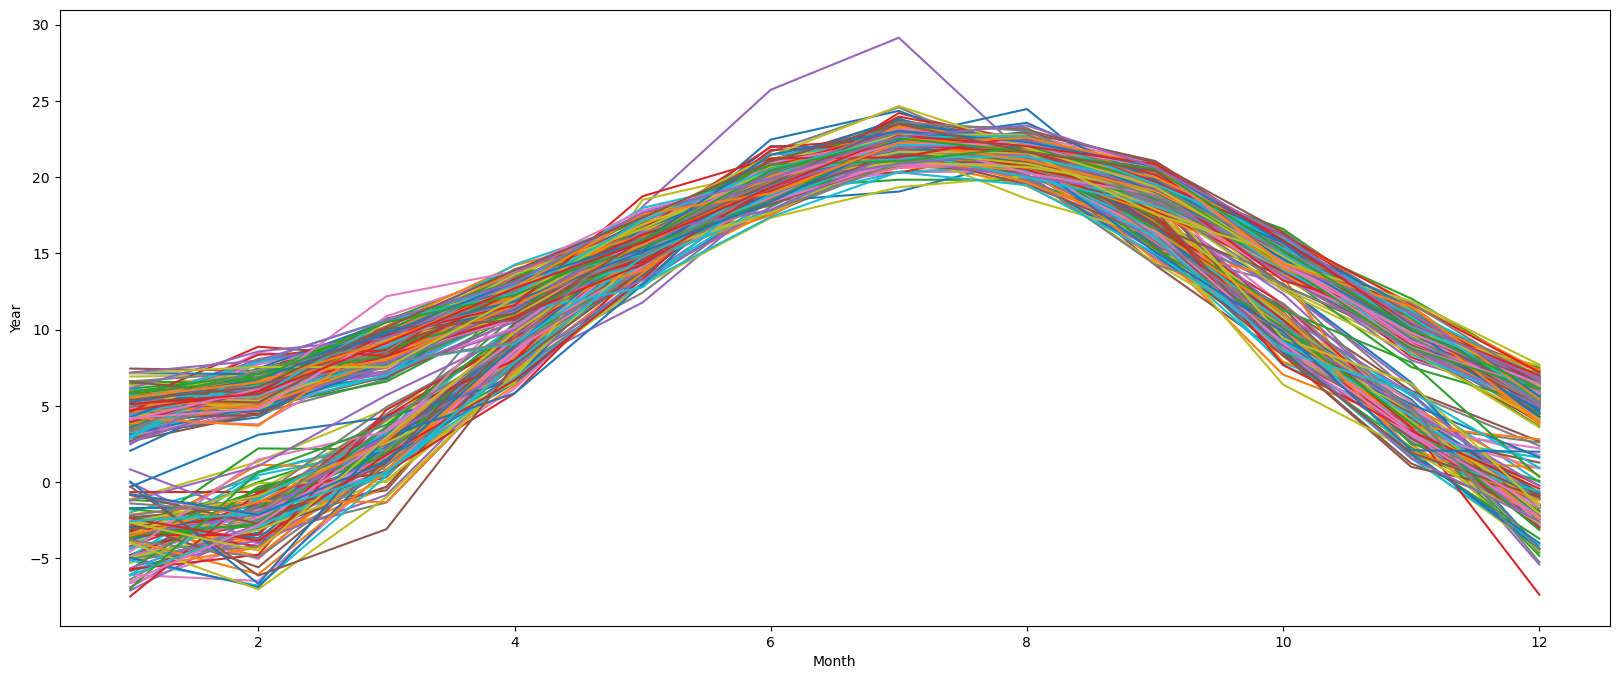

In [41]:
## if we want to plot with respect to time or index of dataframe ,  
## we can use pivot.plot() function of pandas ..
pivot.plot(figsize = (20,8))
plt.legend().remove()
plt.xlabel('Month')
plt.ylabel('Year')

    looking this graph,we can say this data is seasonal
        The series clearly has some seasonality, the higher temperatures 
        are around b/w June & August and the lower are between December & Feb
        so thats basically a observation that u can drawn and represent to ur client..


## whether data is stationary or not

### ways to find that...
    a.. using data visualisation (lineplot to find out 
                               whats a trend of data)
                               
    b.. Evaluating the descriptive statistics ( ie compute
                 mean & variance of various chunks of data )
https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/

    c.. using statistical Tests (AD-Fuller , KPSS Test )

<Axes: xlabel='Date'>

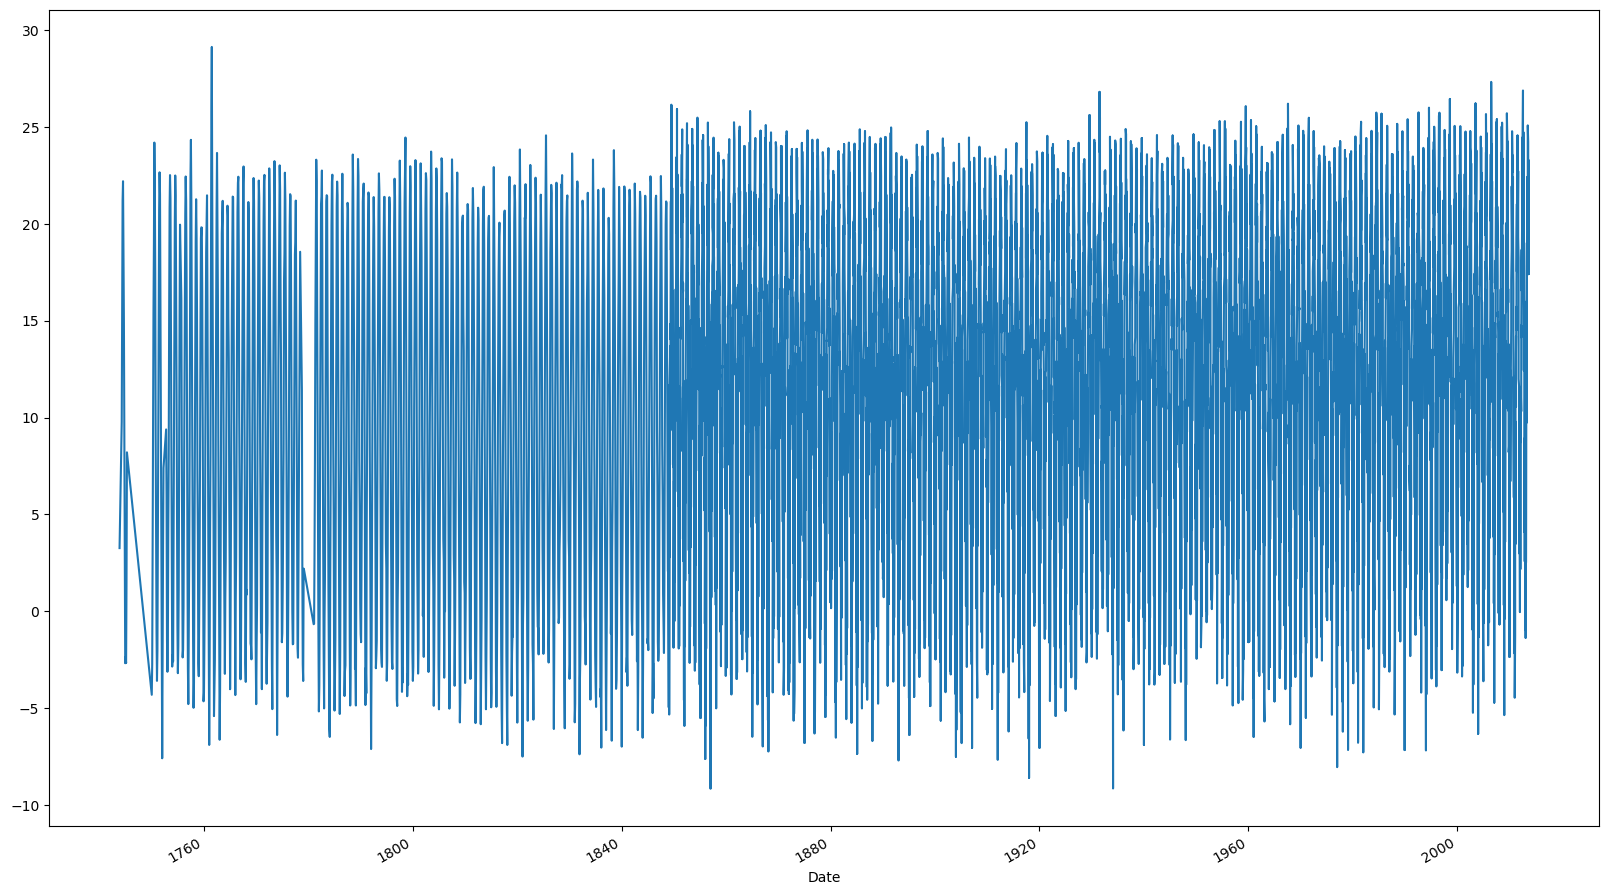

In [42]:
city_data['Temp'].plot(figsize = (20,12))

By looking at the above plot we can be sure that seasonality exists in the data. As evident by the spread of data in the above plot, there is significance variation in the data. So, to convert the data into stationary we have to flatten the growing variance.

It seems that data is seasonal in nature.. The spread of the data indicates that there is a significant variation in the data. 
To flatten the growing variance, we need to transform the data.

A recurring pattern with a defined and predictable regularity dependent on the time of year, week, or day 
is referred to as seasonality.

#### b.. using statistical Tests
https://analyticsindiamag.com/how-to-make-a-time-series-stationary/


    >> Ad-fuller Test
    >> Kwiatkowski Phillips Schmidt Shin (KPSS) test

In [43]:
from statsmodels.tsa.stattools import adfuller

adfuller(city_data['Temp'])

(-2.0063893036758143,
 0.28377865833331783,
 35,
 7037,
 {'1%': -3.431279613044704,
  '5%': -2.8619508146206374,
  '10%': -2.5669886726127307},
 28011.222669408726)

adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used','critical values']

most imp is p-value
p-value concept is almost similar to Hypothesis testing,
Hypothesis Testing have 2 Hypothesis(Alternate & Null Hypothesis)

Null hypo says Data is not Stationery
whereas Alternate hypo says data is stationery

lags are those which are our previous Data

if Pvalue < 0.05 ,we reject Null hypo ie alternate hypo is true,ie data is stationery

Ho: ie null hypoIt is non stationary
H1: ie Alternate Hypo ,It is stationary
zip basically combines result,labels

In [44]:
def adfuller_test(data):
    result=adfuller(data)
    
    labels=['ADF Test statistics','p-value','lags_used','nobs']
    
    for value,label in zip(result,labels):
        print(label + ' : ' + str(value))
    if result[1] <=0.05:
        print('reject the Ho ,data is stationary')
    else:
        print('fail to reject the Ho ,data is not stationary')
    

In [45]:
adfuller_test(city_data['Temp'])

ADF Test statistics : -2.0063893036758143
p-value : 0.28377865833331783
lags_used : 35
nobs : 7037
fail to reject the Ho ,data is not stationary


# How to make your data stationary

#### Now data is not non-stationary ,ie we have to make it stationary..
    using log , sq root , cube root , differencing etc...

In [46]:
city_data['Temp'].head(10)

Date
1849-01-01     8.819
1849-02-01     9.577
1849-03-01    11.814
1849-04-01    13.704
1849-05-01    14.834
1849-06-01    21.173
1849-07-01    26.159
1849-08-01    26.099
1849-09-01    21.848
1849-10-01    16.549
Name: Temp, dtype: float64

In [47]:
city_data['Temp'].shift(3).head(10)

Date
1849-01-01       NaN
1849-02-01       NaN
1849-03-01       NaN
1849-04-01     8.819
1849-05-01     9.577
1849-06-01    11.814
1849-07-01    13.704
1849-08-01    14.834
1849-09-01    21.173
1849-10-01    26.159
Name: Temp, dtype: float64

In [48]:
city_data['first_temp_diff'] = city_data['Temp'] - city_data['Temp'].shift(12)
city_data.head(13)

,Temp,Year,Month,first_temp_diff
Date,,,,
1849-01-01,8.819,1849,1,NaN
1849-02-01,9.577,1849,2,NaN
1849-03-01,11.814,1849,3,NaN
1849-04-01,13.704,1849,4,NaN
1849-05-01,14.834,1849,5,NaN
1849-06-01,21.173,1849,6,NaN
1849-07-01,26.159,1849,7,NaN
1849-08-01,26.099,1849,8,NaN
1849-09-01,21.848,1849,9,NaN


why taken shift(12) , bcz basically year has 12 month cycle , ie in order to remove seasonal component..

In previous diagram of pivot table , we have figured out that we have yearly seasonality.. , 
so lets use shift(12) to remove seasonality

In [49]:
adfuller_test(city_data['first_temp_diff'].dropna())

ADF Test statistics : -21.2396504049109
p-value : 0.0
lags_used : 35
nobs : 7025
reject the Ho ,data is stationary


now our p-value is less than 0.05 which basically says we are rejecting null hypo and accepting alternate hypo
ie data is stationery

Note : if p-value is almost 0, then we can say , we have a wonderful stationary graph

<Axes: xlabel='Date'>

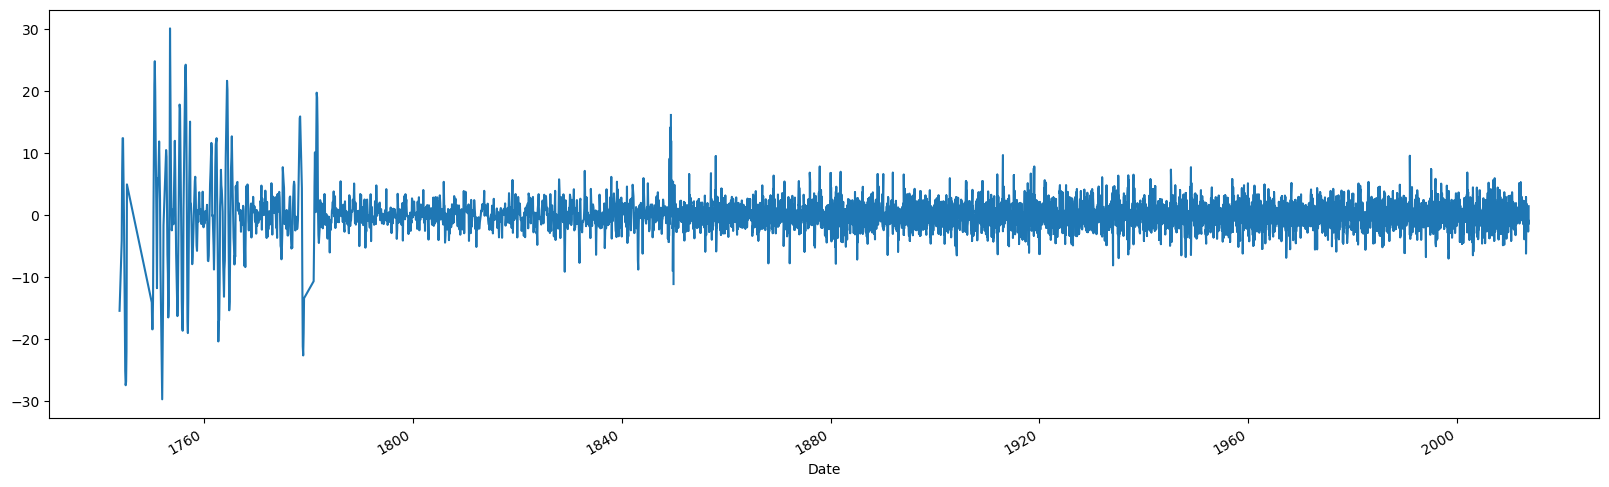

In [50]:
city_data['first_temp_diff'].plot(figsize=(20,6))

# Time Series model
    Lets Build a basic moving Avg model 
    
        types of models in Time-Series :
         1.Base line model
         2.Exponential model
         3.AR model
         4.MA model
         5.ARIMA model
         6.SARIMA model(Seasonal ARIMA)

In [51]:
df = city_data[['first_temp_diff']]
df.head(10)

,first_temp_diff
Date,
1849-01-01,NaN
1849-02-01,NaN
1849-03-01,NaN
1849-04-01,NaN
1849-05-01,NaN
1849-06-01,NaN
1849-07-01,NaN
1849-08-01,NaN
1849-09-01,NaN


In [52]:
df.dropna(inplace=True)

In [53]:
## Smoothening your series using moving average
## Rolling is just like a window that you are going to consider or I can say its a window that we have considered for Moving average,
## lets say 5 is the window size or 5 is the business period
df['Predictions']=df['first_temp_diff'].rolling(window=5).mean()

In [54]:
df.head(10)

,first_temp_diff,Predictions
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594


In [55]:
df.dropna(inplace=True)
df.head(10)

,first_temp_diff,Predictions
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594
1850-10-01,1.028,-0.4136
1850-11-01,0.024,-0.2224
1850-12-01,-0.779,0.1646
1851-01-01,0.462,0.2898


In [56]:
df.columns=['actual_temp','forecast_temp']
df.head(10)

,actual_temp,forecast_temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594
1850-10-01,1.028,-0.4136
1850-11-01,0.024,-0.2224
1850-12-01,-0.779,0.1646
1851-01-01,0.462,0.2898


In [57]:
### check accuracy of your model using RMSE..

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df['actual_temp'],df['forecast_temp']))

## why np.sqrt, bcz mean_squared_error gives square of error and then by 
# calling np.sqrt we get actual error

2.3934235122562058

we are getting error of 2.4 degree celsius every day, it means error of +-2.39 is going to happen in your prediction.

# Build ARIMA Model

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

In [59]:
df.head(3)

,actual_temp,forecast_temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530


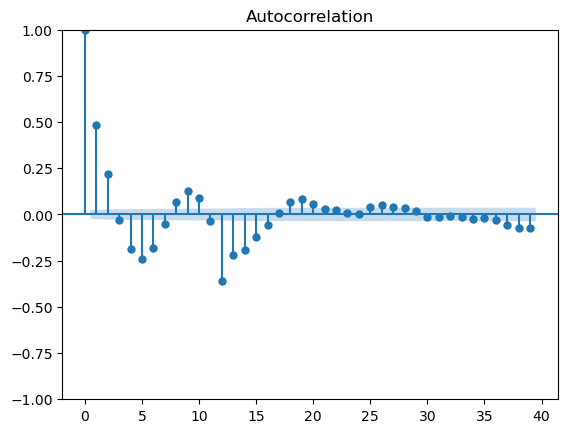

In [60]:
plot_acf(df['actual_temp'])
plt.show()
## q-3

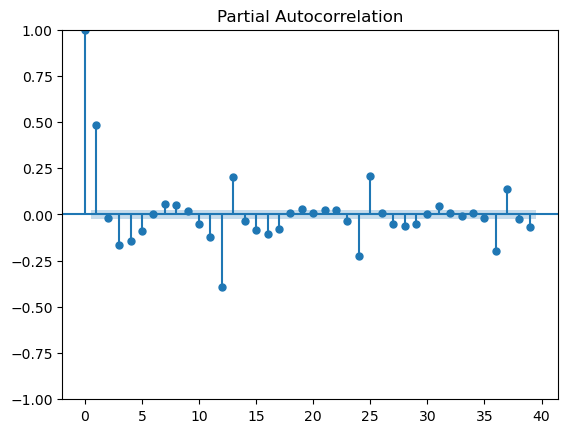

In [61]:
plot_pacf(df['actual_temp'])
plt.show()
## p-2

In [62]:
df = df[['actual_temp']]
df.head(2)

,actual_temp
Date,
1850-05-01,1.799
1850-06-01,-0.932


In [63]:
df.shape

(7057, 1)

In [64]:
df.isnull().sum()

actual_temp    0
dtype: int64

In [65]:
# df.index 

In [66]:
# df.index = pd.to_datetime(df.index)

In [67]:
# df.index = pd.DatetimeIndex(df.index).to_period('M')

In [68]:
# df.index 

In [69]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima.model.ARMA',
                        FutureWarning)

In [70]:
training_data = df[0:6000]
testing_data = df[6000:]

### create test data that is basically unseen to our model or which is 
### basically is used for evalaution

In [71]:
# training_data.index

In [72]:
df

,actual_temp
Date,
1850-05-01,1.799
1850-06-01,-0.932
1850-07-01,-2.714
1850-08-01,-0.164
1850-09-01,0.714
...,...
2013-05-01,0.879
2013-06-01,1.277
2013-07-01,1.025


In [73]:
# from statsmodels.tsa.arima.model import ARIMA

### arima= ARIMA(training_data,order=(p,d,q))

arima = ARIMA(training_data,order=(2,1,3))
model = arima.fit()

In [74]:
## doing predictions..

pred = model.forecast(steps=len(testing_data))

In [75]:
pred

6000   -0.405403
6001    0.151817
6002   -0.250074
6003    0.177058
6004   -0.192336
          ...   
7052   -0.002116
7053   -0.002116
7054   -0.002116
7055   -0.002116
7056   -0.002116
Name: predicted_mean, Length: 1057, dtype: float64

In [76]:
len(pred)

1057

In [77]:
len(testing_data)

1057

In [78]:
np.sqrt(mean_squared_error(testing_data,pred))

1.5124854319809042

now u will see it is better than MA model that we have created having Error as (2.4 degree centigrade) 
has decreased to 1.5 which shows that arima model is much more good in such sceanario rather than Baseline 

## Model Tuning or Hyperparameter Tuning

In [83]:
#### now define hyper-para=meters 

p_values=range(0,4)
d_values=range(0,3)
q_values=range(0,4)

value_order = []

### so we are just trying to provide pairs of (p,d,q) & whichever pair will give me least error i will consider that pair, 

for p in p_values:
    for d in d_values:
        for q in q_values:
            value_order.append((p,d,q))

In [86]:
error = []
predictions=[]

In [87]:
for v in range(len(value_order)):
    train=df[0:6000]
    test=df[6000:]

    arima = ARIMA(train,order = value_order[v])
    ## Role of disp(displacement) is to control the frequency of the output during the iterations. 
    
    model = arima.fit()
    pred_y = model.forecast(steps = len(test))
    predictions.append(pred_y)
    error.append(mean_squared_error(test,predictions[v]))
    #print('MSE is {} with order {}'.format(error[v],value_order[v]))

MSE is 2.2890331442749794 with order (0, 0, 0)
MSE is 2.2885401380958887 with order (0, 0, 1)
MSE is 2.289186069032668 with order (0, 0, 2)
MSE is 2.289433678851527 with order (0, 0, 3)
MSE is 2.296773525070955 with order (0, 1, 0)
MSE is 2.357506008844138 with order (0, 1, 1)
MSE is 2.2885350744203885 with order (0, 1, 2)
MSE is 2.28916284537622 with order (0, 1, 3)
MSE is 962075.3219242723 with order (0, 2, 0)
MSE is 2.355986891874463 with order (0, 2, 1)
MSE is 2.3333910269463356 with order (0, 2, 2)
MSE is 2.2947958321438797 with order (0, 2, 3)
MSE is 2.2889959825625104 with order (1, 0, 0)
MSE is 2.288956568173469 with order (1, 0, 1)
MSE is 2.2893495755614075 with order (1, 0, 2)
MSE is 2.2899254826163142 with order (1, 0, 3)
MSE is 2.3329605059416956 with order (1, 1, 0)
MSE is 2.28898689711398 with order (1, 1, 1)
MSE is 2.2889506240637023 with order (1, 1, 2)
MSE is 2.2893464708992637 with order (1, 1, 3)
MSE is 137702.92422223033 with order (1, 2, 0)
MSE is 2.306107938655795

In [94]:
print('MSE is minimum when order is {}, with a value of {}'.format(value_order[np.argmin(error)],np.round(np.min(error),4)))

MSE is minimum when order is (2, 0, 3), with a value of 2.2865


In [ ]:
order1=(1,1,2)
train=df[0:6000]
test=df[6000:]
            
predictions=[]
            
            ### now we have train & test data that we can pass to our algorithm
for i in range(len(test)):
    try:
        arima=ARIMA(train,order=order1)
        ## Role of disp(displacement) is to control the frequency of the output during the iterations. 

        model=arima.fit()

        pred_y=model.forecast()[0]
        print(pred_y)
        predictions.append(pred_y)
        error=mean_squared_error(test,predictions)
        print('MSE is {} with order {}'.format(error,order))

In [ ]:
train=df[0:6000]
test=df[6000:]
            
predictions=[]

In [ ]:
order1=(3,1,1)

arima=ARIMA(train,order=order1)
## Role of disp(displacement) is to control the frequency of the output during the iterations. 

model=arima.fit()

pred_y=model.forecast(steps=len(test))

In [ ]:
print(pred_y)

In [ ]:
predictions.append(pred_y)

In [ ]:
predictions[2].values

In [ ]:
test

In [ ]:
error=mean_squared_error(test,predictions[2])
print('MSE is {} with order {}'.format(error,order1))

In [ ]:
### so we are just trying to provide pairs of (p,d,q) & whichever pair will give me least error i will consider that pair, 

for p in p_values:
    for d in d_values:
        for q in q_values:
            order1=(p,d,q)
            
            train=df[0:6000]
            test=df[6000:]
            
            predictions=[]
            
            ### now we have train & test data that we can pass to our algorithm
            for i in range(len(test)):
                try:
                    arima=ARIMA(train,order=order1)
                    ## Role of disp(displacement) is to control the frequency of the output during the iterations. 
                    
                    model=arima.fit()
                    pred_y=model.forecast()
                    predictions.append(pred_y)
                    
                except:
                    continue
        
            error=mean_squared_error(test,predictions)
            print('MSE is {} with order {}'.format(error,order1))

MSE is 2.2890331442749794 with order (0, 0, 0)
MSE is 2.355555998920375 with order (0, 0, 1)
MSE is 2.309343672778218 with order (0, 0, 2)


MSE is 2.2890331442749794 with order (0, 0, 0)
MSE is 2.355555998920375 with order (0, 0, 1)
MSE is 2.309343672778218 with order (0, 0, 2)
MSE is 2.292551820680853 with order (0, 0, 3)
MSE is 2.296773525070955 with order (0, 1, 0)
MSE is 2.357506008844138 with order (0, 1, 1)
MSE is 2.3555579201543284 with order (0, 1, 2)
MSE is 2.3092706095942015 with order (0, 1, 3)
MSE is 5.163795001002687 with order (0, 2, 0)
MSE is 2.296824994460382 with order (0, 2, 1)
MSE is 2.357275104847958 with order (0, 2, 2)
MSE is 2.4229708432168136 with order (0, 2, 3)
MSE is 2.2915394469221892 with order (1, 0, 0)
MSE is 2.2955643437646085 with order (1, 0, 1)
MSE is 2.289050991325842 with order (1, 0, 2)
MSE is 2.342172904250098 with order (1, 0, 3)
MSE is 2.366224980252623 with order (1, 1, 0)
MSE is 2.2915272424322564 with order (1, 1, 1)
MSE is 2.295589975347806 with order (1, 1, 2)
MSE is 2.2890437205092495 with order (1, 1, 3)
MSE is 2.3015507786477496 with order (1, 2, 0)
MSE is 2.365978235798044 with order (1, 2, 1)
MSE is 2.5139379832453517 with order (1, 2, 2)